In [2]:
import numpy as np 
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks
from keras.utils import to_categorical
import numpy as np
import pandas as pd
train_data=pd.read_csv("train.csv")


X_train, X_val = train_test_split(train_data, test_size=0.2, random_state=18)

In [4]:

X=X_train.drop("emotions",axis=1)
Y=X_train["emotions"]
X_valid=X_val.drop("emotions",axis=1)
Y_valid=X_val["emotions"]

In [24]:
model=keras.Sequential([
    layers.BatchNormalization(input_shape=[2304]),
    layers.Dense(96,activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu'),
    layers.Dense(7,activation='linear'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()


early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_19 (Ba  (None, 2304)              9216      
 tchNormalization)                                               
                                                                 
 dense_31 (Dense)            (None, 96)                221280    
                                                                 
 dropout_14 (Dropout)        (None, 96)                0         
                                                                 
 batch_normalization_20 (Ba  (None, 96)                384       
 tchNormalization)                                               
                                                                 
 dense_32 (Dense)            (None, 128)               12416     
                                                                 
 dropout_15 (Dropout)        (None, 128)              

Epoch 1/500
718/718 [==============================] - 13s 13ms/step - loss: 1.8357 - accuracy: 0.2491 - val_loss: 1.7010 - val_accuracy: 0.3325
Epoch 2/500
718/718 [==============================] - 9s 13ms/step - loss: 1.7418 - accuracy: 0.2988 - val_loss: 1.6697 - val_accuracy: 0.3382
Epoch 3/500
718/718 [==============================] - 8s 12ms/step - loss: 1.7062 - accuracy: 0.3209 - val_loss: 1.6467 - val_accuracy: 0.3481
Epoch 4/500
718/718 [==============================] - 8s 12ms/step - loss: 1.6811 - accuracy: 0.3322 - val_loss: 1.6276 - val_accuracy: 0.3678
Epoch 5/500
718/718 [==============================] - 8s 12ms/step - loss: 1.6622 - accuracy: 0.3432 - val_loss: 1.6121 - val_accuracy: 0.3643
Epoch 6/500
718/718 [==============================] - 9s 12ms/step - loss: 1.6485 - accuracy: 0.3485 - val_loss: 1.6016 - val_accuracy: 0.3718
Epoch 7/500
718/718 [==============================] - 8s 11ms/step - loss: 1.6385 - accuracy: 0.3532 - val_loss: 1.5925 - val_accuracy

<Axes: >

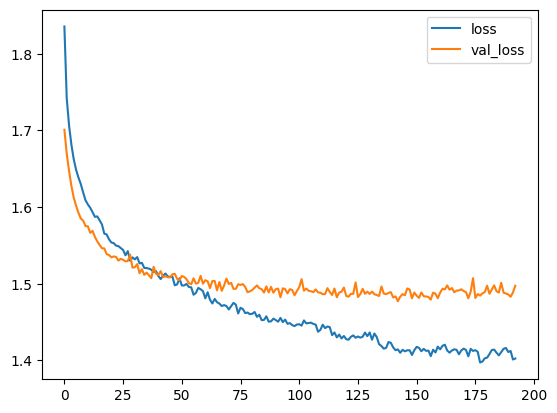

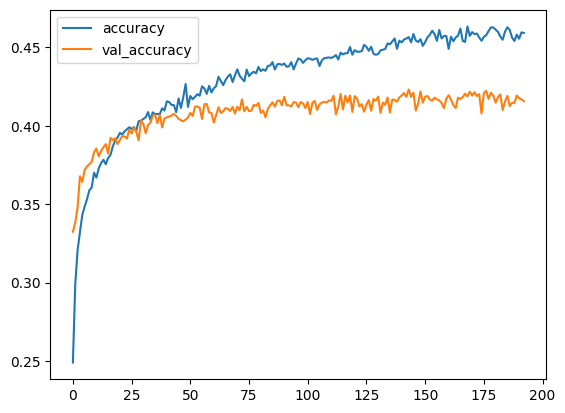

In [25]:
history = model.fit(X, Y, validation_data=(X_valid, Y_valid), epochs=500,callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()